In [1]:
#importing the librarys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

In [2]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
data.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


In [4]:
test.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,female,group C,some college,standard,none,67,72
1,1,male,group E,some college,standard,none,60,59
2,2,female,group C,bachelor's degree,standard,none,93,95
3,3,male,group D,associate's degree,standard,none,48,46
4,4,female,group B,associate's degree,standard,none,76,80


In [5]:
data.columns

Index(['Unnamed: 0', 'gender', 'ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'reading score', 'writing score',
       'math score'],
      dtype='object')

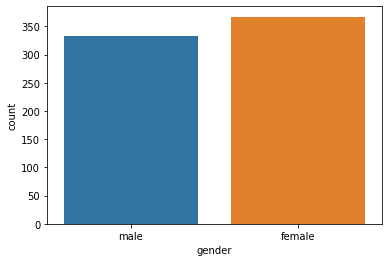

In [21]:
#count plot for gender
sns.countplot(x="gender",data=data)
plt.show()

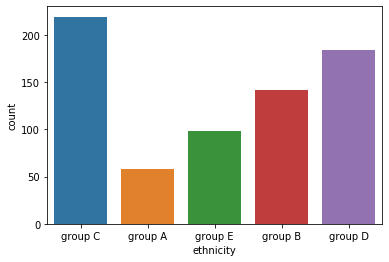

In [12]:
#countplot for ethnicity
sns.countplot(x="ethnicity",data=data)

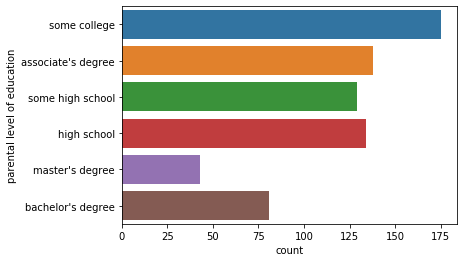

In [14]:
#countplot for parental education 
sns.countplot(y="parental level of education",data=data)

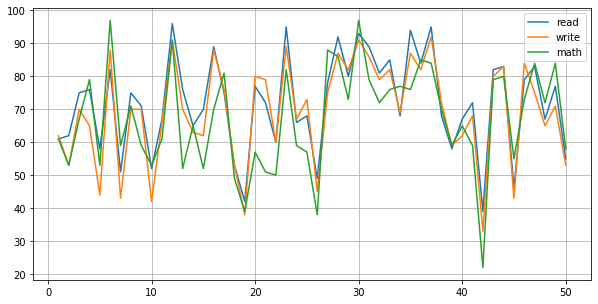

In [7]:
#line plot of diff subject scores 
plt.figure(figsize=[10,5])
plt.plot(range(1,51), data["reading score"][:50] )
plt.plot(range(1,51), data["writing score"][:50] )
plt.plot(range(1,51), data["math score"][: 50] )
plt.legend(["read","write","math"])
plt.grid()
plt.show()

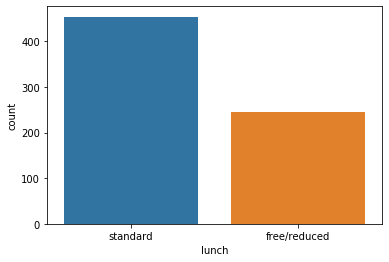

In [15]:
#countplot for diff type of lunch 
sns.countplot(x="lunch",data=data)

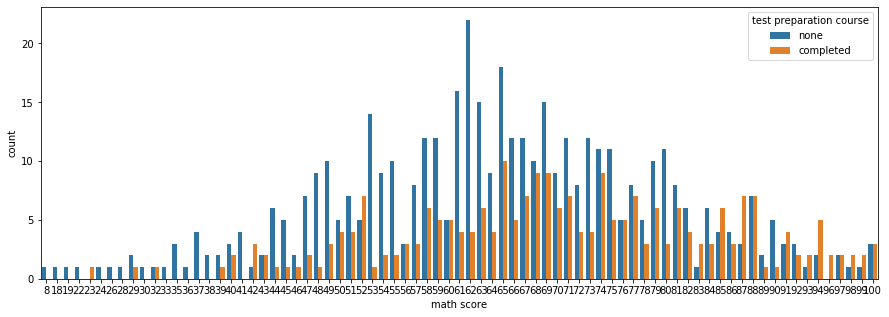

In [41]:
#count plot of math score with hue as test preparation type
plt.figure(figsize=[15,5])
sns.countplot(x="math score",hue="test preparation course",data=data)

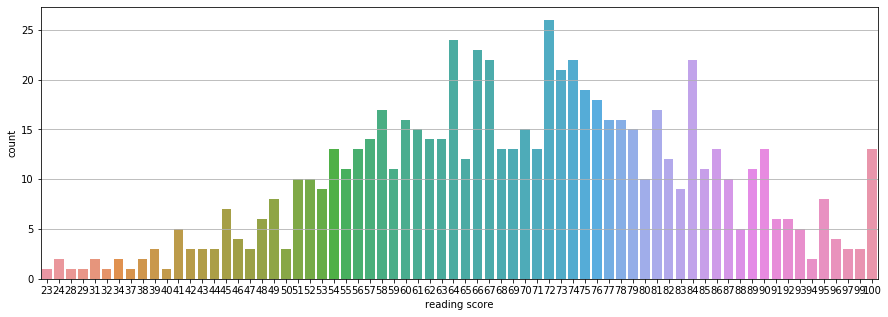

In [36]:
#count plot for reading score 
plt.figure(figsize=[15,5])
plt.grid()
sns.countplot(x="reading score",data=data)
plt.show()

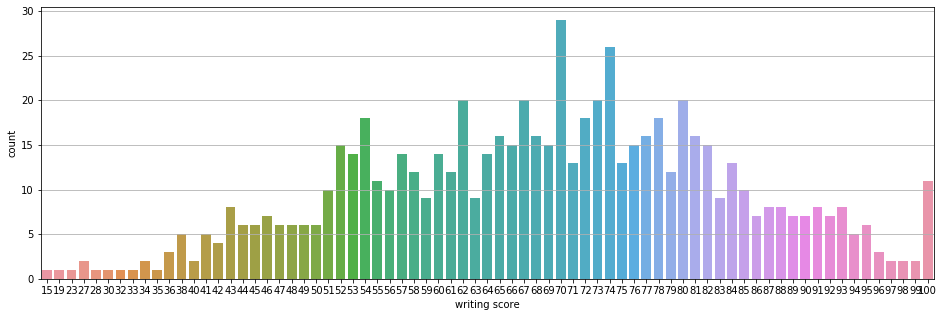

In [31]:
#count plot for writing score 
plt.figure(figsize=[16,5])
plt.grid()
sns.countplot(x="writing score",data=data)

### Cleaning data

In [51]:
data.columns

Index(['Unnamed: 0', 'gender', 'ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'reading score', 'writing score',
       'math score'],
      dtype='object')

In [14]:
# ONE HOT ENCODING for objects types of features 
gender=pd.get_dummies(data["gender"],drop_first=True)
ethnicity=pd.get_dummies(data["ethnicity"],drop_first=True)
parental_eduction=pd.get_dummies(data["parental level of education"],drop_first=True)
lunch=pd.get_dummies(data["lunch"],drop_first=True)
preparation=pd.get_dummies(data["test preparation course"],drop_first=True)
math_score=data["math score"]

In [8]:
new_data=data.drop(labels=["math score","Unnamed: 0","gender","ethnicity","lunch","test preparation course","parental level of education"],axis=1)

In [9]:
new_data.head()

,reading score,writing score
0,61,62
1,62,53
2,75,70
3,76,65
4,58,44


In [10]:
#standard scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(new_data)
data1=scaler.transform(new_data)
data1=pd.DataFrame(data1,index=new_data.index,columns=new_data.columns)
data1.head()

,reading score,writing score
0,-0.599805,-0.427067
1,-0.531267,-1.018652
2,0.359727,0.098785
3,0.428265,-0.229873
4,-0.805420,-1.610236


In [15]:
train_data=pd.concat([data1,gender,ethnicity,parental_eduction,lunch,preparation,math_score],axis=1)

In [16]:
#data going to use for math score prediction
train_data.head()

,reading score,writing score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none,math score
0,-0.599805,-0.427067,1,0,1,0,0,0,0,0,1,0,1,1,61
1,-0.531267,-1.018652,0,0,1,0,0,0,0,0,0,0,1,1,53
2,0.359727,0.098785,0,0,1,0,0,0,0,0,1,0,0,0,67
3,0.428265,-0.229873,1,0,1,0,0,0,0,0,0,1,0,1,79
4,-0.805420,-1.610236,1,0,0,0,0,0,1,0,0,0,0,1,53


In [17]:
test.columns

Index(['Unnamed: 0', 'gender', 'ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'reading score', 'writing score'],
      dtype='object')

In [18]:
# Doing the same pre-processing for test data
gender=pd.get_dummies(test["gender"],drop_first=True)
ethnicity=pd.get_dummies(test["ethnicity"],drop_first=True)
parental_eduction=pd.get_dummies(test["parental level of education"],drop_first=True)
lunch=pd.get_dummies(test["lunch"],drop_first=True)
preparation=pd.get_dummies(test["test preparation course"],drop_first=True)

In [19]:
new_data=test.drop(labels=["Unnamed: 0","gender","ethnicity","lunch","test preparation course","parental level of education"],axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler().fit(new_data)
data1=scaler.transform(new_data)
data1=pd.DataFrame(data1,index=new_data.index,columns=new_data.columns)
data1.head()

,reading score,writing score
0,-0.188577,0.230248
1,-0.668343,-0.624262
2,1.593411,1.742075
3,-1.490800,-1.478773
4,0.428265,0.756101


In [21]:
test_data=pd.concat([data1,gender,ethnicity,parental_eduction,lunch,preparation],axis=1)

In [22]:
test_data.head()

,reading score,writing score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,-0.188577,0.230248,0,0,1,0,0,0,0,0,1,0,1,1
1,-0.668343,-0.624262,1,0,0,0,1,0,0,0,1,0,1,1
2,1.593411,1.742075,0,0,1,0,0,1,0,0,0,0,1,1
3,-1.490800,-1.478773,1,0,0,1,0,0,0,0,0,0,1,1
4,0.428265,0.756101,0,1,0,0,0,0,0,0,0,0,1,1


In [23]:
train_data.head()

,reading score,writing score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none,math score
0,-0.599805,-0.427067,1,0,1,0,0,0,0,0,1,0,1,1,61
1,-0.531267,-1.018652,0,0,1,0,0,0,0,0,0,0,1,1,53
2,0.359727,0.098785,0,0,1,0,0,0,0,0,1,0,0,0,67
3,0.428265,-0.229873,1,0,1,0,0,0,0,0,0,1,0,1,79
4,-0.805420,-1.610236,1,0,0,0,0,0,1,0,0,0,0,1,53


### Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import linear_model

### Culstring before reg...

#### culstering the students into different culsters and building different regression for each cluster 

In [27]:
x=train_data.drop(["math score"],axis=1)
y=train_data["math score"]

In [68]:
error=[]
for i in range(2,5):
   model=KMeans(random_state=0,n_clusters=i).fit(x)
   error.append(model.inertia_)

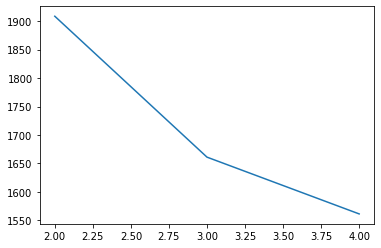

In [69]:
plt.plot(range(2,5), error)
plt.show()

##### no of culsting is taken as 3 

In [131]:
model_C=KMeans(random_state=0,n_clusters=3).fit(x)

In [140]:
c1=pd.DataFrame(columns=train_data.columns)
c2=pd.DataFrame(columns=train_data.columns)
c3=pd.DataFrame(columns=train_data.columns)

index=model_C.predict(x)

for i in range(len(index)):
    if index[i]==0:
        c1.loc[len(c1.index)]=train_data.iloc[i]
    elif index[i]==1:
        c2.loc[len(c2.index)]=train_data.iloc[i]
    elif index[i]==2:
        c3.loc[len(c3.index)]=train_data.iloc[i]
    else:
        print("Error")


In [141]:
len(c1),len(c2),len(c3)

(208, 176, 316)

#### Cluster 1

In [228]:
x1=c1.drop(["math score"],axis=1)
y1=c1["math score"]

In [229]:
X_train, X_test, y_train, y_test=train_test_split(x1,y1,test_size=0.2)

In [242]:
#testing model
model1=LinearRegression(fit_intercept=True,normalize=False)
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [245]:
#final model
model1=LinearRegression(fit_intercept=True,normalize=False)
model1.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [246]:
model1.score(X_train,y_train),model1.score(X_test,y_test),model1.score(x1,y1)
#(0.7872567853434413, 0.7642286930077352, 0.7829435325159717)

(0.7818352394054741, 0.8073371841444427, 0.788362655624524)

#### Cluster 2

In [247]:
x2=c2.drop(["math score"],axis=1)
y2=c2["math score"]
X_train, X_test, y_train, y_test=train_test_split(x2,y2,test_size=0.2)

In [254]:
#testing model
model2=LinearRegression(fit_intercept=True,normalize=True)
model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [261]:
#final model
model2=LinearRegression(fit_intercept=True,normalize=True)
model2.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [262]:
model2.score(X_train,y_train),model2.score(X_test,y_test),model2.score(x2,y2)
#(0.8587686141292141, 0.619892683597697, 0.8140049919406869)

(0.6998937341018113, 0.6244791497292096, 0.820688688188783)

#### Cluster 3

In [263]:
x3=c3.drop(["math score"],axis=1)
y3=c3["math score"]
X_train, X_test, y_train, y_test=train_test_split(x3,y3,test_size=0.2)

In [269]:
#testing model
model3=LinearRegression(fit_intercept=True,normalize=True)
model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [271]:
#final model
model3=LinearRegression(fit_intercept=True,normalize=True)
model3.fit(x3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [272]:
model3.score(X_train,y_train),model3.score(X_test,y_test),model3.score(x3,y3)
#(0.7363108301049002, 0.6943561965787387, 0.7303742008094012)

(0.7311317693810315, 0.7406959209210989, 0.7356632700987668)

##### cluster prediction

In [273]:
tc1=pd.DataFrame(columns=test_data.columns)
tc2=pd.DataFrame(columns=test_data.columns)
tc3=pd.DataFrame(columns=test_data.columns)

test_index=model_C.predict(test_data)

for i in range(len(test_index)):
    if index[i]==0:
        tc1.loc[len(tc1.index)]=test_data.iloc[i]
    elif index[i]==1:
        tc2.loc[len(tc2.index)]=test_data.iloc[i]
    elif index[i]==2:
        tc3.loc[len(tc3.index)]=test_data.iloc[i]
    else:
        print("Error")


In [274]:
len(tc1),len(tc2),len(tc3)

(91, 69, 140)

In [275]:
res1=model.predict(tc1)
res2=model.predict(tc2)
res3=model.predict(tc3)

In [176]:
tc1.iloc[0],res1[0]

(reading score        1.867563
 writing score        1.807806
 male                 0.000000
 group B              1.000000
 group C              0.000000
 group D              0.000000
 group E              0.000000
 bachelor's degree    1.000000
 high school          0.000000
 master's degree      0.000000
 some college         0.000000
 some high school     0.000000
 standard             1.000000
 none                 1.000000
 Name: 0, dtype: float64, 89.48784619942728)

In [276]:
sample=pd.DataFrame(columns=["index","math score"])

In [277]:
for j in range(len(tc1)):
    for i in range(len(test_data)):
       if sum(tc1.iloc[j]==test_data.iloc[i])==14:
        sample.loc[len(sample.index)]=(i,res1[j])
         
            

In [278]:
for j in range(len(tc2)):
    for i in range(len(test_data)):
       if sum(tc2.iloc[j]==test_data.iloc[i])==14:
        sample.loc[len(sample.index)]=(i,res2[j])
        break
         
            

In [279]:
for j in range(len(tc3)):
    for i in range(len(test_data)):
       if sum(tc3.iloc[j]==test_data.iloc[i])==14:
        sample.loc[len(sample.index)]=(i,res3[j])
        break
         
            

In [282]:
temp=sample

In [283]:
sample.index=sample["index"]

In [284]:
sample=sample.drop(labels=["index"],axis=1)

In [285]:
sample=sample.sort_index()

In [286]:
s=pd.read_csv("sample_submissions.csv")

In [287]:
s=s.drop(labels=["math score"],axis=1)

In [288]:
s["math score"]=sample["math score"]

In [289]:
s.to_csv("culster_3_2.csv",index=False)

## LinearRegression

In [29]:
X_train, X_test, y_train, y_test=train_test_split(x,y)

In [108]:
model=LinearRegression(fit_intercept=True,normalize=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

## Lasso Regression

In [103]:
model = linear_model.Lasso(alpha=0.5)
model.fit(X_train,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
model.score(X_train,y_train),model.score(X_test,y_test)
#(0.886650191571781, 0.8740573055564635)

(0.7130532095957853, 0.777560370241758)

In [195]:
model = linear_model.Lasso(alpha=0.5)
model.fit(x,y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
model.score(x,y)
#0.8843134073154246

0.8527787011272037

In [184]:
y_pred=model.predict(test_data)

In [185]:
y_pred=np.round(y_pred,0)

In [186]:
sample=pd.read_csv("sample_submissions.csv")

sample=sample.drop(["math score"],axis=1)

sample["math score"]=y_pred

sample.to_csv("reg9.csv",index=False)

## Poly Reg

In [145]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(3)
x_train1=poly.fit_transform(X_train)

In [146]:
model=LinearRegression()
model.fit(x_train1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
model.score(x_train1,y_train),model.score(poly.transform(X_test),y_test)

(0.9490251342722565, -0.8533023365337375)

In [148]:
model.score(poly.transform(x),y)

0.5569524264219337

In [ ]:
model.predict()

## NN

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [30]:
xt=np.array(x)
yt=np.array(y)
xtest=np.array(X_test)
ytest=np.array(y_test)

In [50]:
model1=keras.Sequential([keras.layers.Flatten(),
                  keras.layers.Dense(300,activation=tf.nn.relu),
                  keras.layers.Dense(150,activation=tf.nn.relu),
                  keras.layers.Dense(75,activation=tf.nn.relu),
                  keras.layers.Dense(35,activation=tf.nn.relu),
                  keras.layers.Dense(15,activation=tf.nn.relu),
                  keras.layers.Dense(7,activation=tf.nn.relu),
                  keras.layers.Dense(3,activation=tf.nn.relu),
                  keras.layers.Dense(2,activation=tf.nn.relu),
                  keras.layers.Dense(1,activation=tf.nn.relu),
                         
                 ])

model1.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.mae)

his=model1.fit(xt,yt,epochs=100,validation_split=0.1)

Train on 630 samples, validate on 70 samples
Epoch 1/100
630/630 [==============================] - 2s 3ms/sample - loss: 66.1362 - val_loss: 67.0554
Epoch 2/100
630/630 [==============================] - 0s 369us/sample - loss: 62.1810 - val_loss: 53.6354
Epoch 3/100
630/630 [==============================] - 0s 226us/sample - loss: 28.9297 - val_loss: 11.2502
Epoch 4/100
630/630 [==============================] - 0s 224us/sample - loss: 10.5971 - val_loss: 9.7621
Epoch 5/100
630/630 [==============================] - 0s 229us/sample - loss: 7.8975 - val_loss: 8.4204
Epoch 6/100
630/630 [==============================] - 0s 218us/sample - loss: 7.2558 - val_loss: 7.8339
Epoch 7/100
630/630 [==============================] - 0s 227us/sample - loss: 6.7186 - val_loss: 7.6738
Epoch 8/100
630/630 [==============================] - 0s 228us/sample - loss: 6.3706 - val_loss: 7.0811
Epoch 9/100
630/630 [==============================] - 0s 215us/sample - loss: 6.0994 - val_loss: 7.0136
Epoch

630/630 [==============================] - 0s 227us/sample - loss: 3.6127 - val_loss: 4.9065
Epoch 78/100
630/630 [==============================] - 0s 230us/sample - loss: 3.5688 - val_loss: 4.9886
Epoch 79/100
630/630 [==============================] - 0s 228us/sample - loss: 3.5825 - val_loss: 4.9141
Epoch 80/100
630/630 [==============================] - 0s 230us/sample - loss: 3.7293 - val_loss: 4.8422
Epoch 81/100
630/630 [==============================] - 0s 215us/sample - loss: 3.5687 - val_loss: 4.8722
Epoch 82/100
630/630 [==============================] - 0s 231us/sample - loss: 3.5974 - val_loss: 5.3334
Epoch 83/100
630/630 [==============================] - 0s 238us/sample - loss: 3.7963 - val_loss: 5.0999
Epoch 84/100
630/630 [==============================] - 0s 223us/sample - loss: 3.5645 - val_loss: 5.0566
Epoch 85/100
630/630 [==============================] - 0s 234us/sample - loss: 4.0249 - val_loss: 5.1105
Epoch 86/100
630/630 [==============================] - 0s 

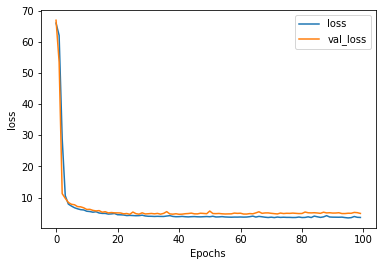

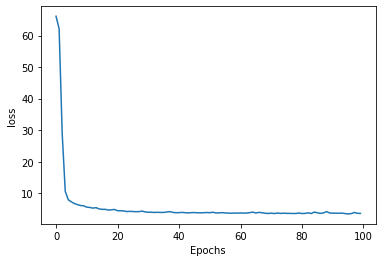

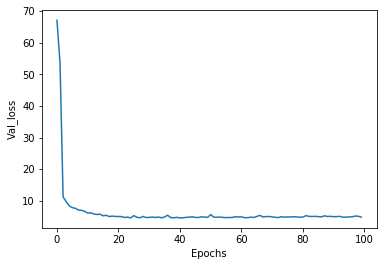

In [51]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
#plot_graphs(his, "accuracy")
plot_graphs(his, "loss")
string="loss"
plt.plot(his.history[string])
plt.xlabel("Epochs")
plt.ylabel(string)
plt.show()

plt.plot(his.history['val_'+string])
plt.xlabel("Epochs")
plt.ylabel("Val_"+string)
plt.show()

In [37]:
y_pred=model1.predict(test_data)

In [102]:
sample=pd.read_csv("sample_submissions.csv")

sample=sample.drop(["math score"],axis=1)

sample["math score"]=y_pred

sample.to_csv("nn4.csv",index=False)